In [1]:
import os
import numpy as np

In [2]:
filepath = os.path.join('..', 'data', 'sample_data', 'sample-data-01.csv')

## np can load csv pretty well as an n-dimensional array

In [3]:
data = np.loadtxt(filepath, delimiter=',')

In [4]:
type(data)

numpy.ndarray

## the type of the data in the array

In [5]:
data.dtype

dtype('float64')

## rows * columns

In [6]:
data.shape

(60, 40)

## indexing does not have to be [row][col], it can be in the same, and slicing works as well
### [from_row:to_row,from_col:to_col]

In [7]:
data[0:4,0:10]

array([[0., 0., 1., 3., 1., 2., 4., 7., 8., 3.],
       [0., 1., 2., 1., 2., 1., 3., 2., 2., 6.],
       [0., 1., 1., 3., 3., 2., 6., 2., 5., 9.],
       [0., 0., 2., 0., 4., 2., 2., 1., 6., 7.]])

## Operations across rows

In [8]:
np.mean(data, axis=0) # Mean for all cols (across rows i.e. several rows' values)
np.mean(data, axis=1) # Mean for all rows (across cols i.e. several cols' values)

array([5.45 , 5.425, 6.1  , 5.9  , 5.55 , 6.225, 5.975, 6.65 , 6.625,
       6.525, 6.775, 5.8  , 6.225, 5.75 , 5.225, 6.3  , 6.55 , 5.7  ,
       5.85 , 6.55 , 5.775, 5.825, 6.175, 6.1  , 5.8  , 6.425, 6.05 ,
       6.025, 6.175, 6.55 , 6.175, 6.35 , 6.725, 6.125, 7.075, 5.725,
       5.925, 6.15 , 6.075, 5.75 , 5.975, 5.725, 6.3  , 5.9  , 6.75 ,
       5.925, 7.225, 6.15 , 5.95 , 6.275, 5.7  , 6.1  , 6.825, 5.975,
       6.725, 5.7  , 6.25 , 6.4  , 7.05 , 5.9  ])

<img src="../data/sample_data/numpy-axes.png" />

## Basic image processing with openCV

In [9]:
import sys
sys.path.append(os.path.join('..')) # Include the home dir in our path to be able to import modules in notebooks that are not child of this dir?
import cv2
from utils.imutils import jimshow

## Read img

In [10]:
img_path = os.path.join('..', 'data', 'img', 'trex.png')
img = cv2.imread(img_path)

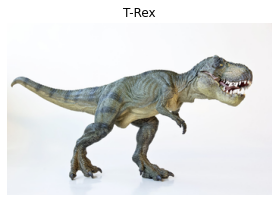

In [11]:
jimshow(img, "T-Rex")

## Writing img

In [12]:
img_dir, _ = os.path.split(img_path)
img_dir

'../data/img'

In [13]:
outfile = os.path.join(img_dir, 'new_dino.jpg')

In [14]:
cv2.imwrite(outfile, img)

True

In [15]:
type(img)

numpy.ndarray

## resolution of image array and the channels
Channels er alfabetisk ffs: BGA (reversed)

In [16]:
img.shape

(228, 350, 3)

## Shifting image down + right

### Translation matrix
25 right, 50 down

In [17]:
M = np.float64([[1, 0, 25],
                [0, 1, 50]])

In [18]:
width = img.shape[1] # Num cols
height = img.shape[0] # Num rows

shifted = cv2.warpAffine(img, M, (width, height)) # Translates img

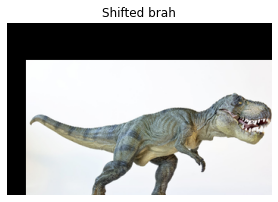

In [19]:
jimshow(shifted, 'Shifted brah')

In [32]:
def translate(img, x = 0, y = 0):
    height, width = img.shape[:2]
    
    m = np.float64([[1, 0, x],
                    [0, 1, y]])
    return cv2.warpAffine(img, m, (width, height)) # Translates img
    

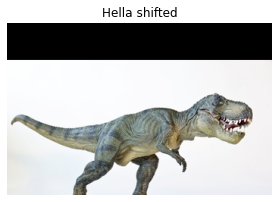

In [34]:
shifted = translate(img, y=50)
jimshow(shifted, 'Hella shifted')